## Preparing the data

### Reading the "mushroom" dataset into memory (pandas dataframe)
This is the "Mushroom" dataset from the UC Irvine Machine Learning Repository.

`Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.`

From UCI ML:
```
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.
```

The dataset is specific to classification problems. It has 22 features, all either binary or categorical. Each instance is classified as either poisonous ("p") or edible ("e").

In [ ]:
import numpy as np
import pandas as pd

mushrooms = pd.read_csv(
    "./datasets/uciml_mushroom/agaricus-lepiota.data",
    names=["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
            "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
            "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
            "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
)

mushrooms.describe(include="all")

### Reading the "census income" dataset into memory (pandas dataframe)
This is the "Census Income" dataset from the UC Irvine Machine Learning Repository.

`Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

The dataset is specific to classification problems. It has 14 features, either binary, categorical or binary. Each instance is an individual, and is classified as either having an income of >50k or <=50k.

In [ ]:
incomes = pd.read_csv(
    "./datasets/uciml_census_income/adult.data",
    names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
)

incomes.describe(include="all")

### Preprocessing
Some features of the datasets are binary or categorical, we need to encode them as floating-point values before proceeding.

To do this, we first specify the data types of these dataframe columns to be "category", and then use the LabelEncoder class from the sklearn preprocessing module to encode the data. Lastly, we pop the target columns from the dataframes, and store them separately to be used as the target vectors.


Aside from the preprocessing module, all algorithms and plotting tools also come from the Scikit-learn library:

`Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.`


In [59]:
from sklearn.preprocessing import LabelEncoder

# Convert category values to float.
label_encoder = LabelEncoder()

# All features in the mushroom dataset are categorical, so this is easy.
mushrooms = mushrooms.astype("category")
mushrooms = mushrooms.apply(
    lambda column: label_encoder.fit_transform(column),
    axis=0
)

income_category_columns = {"workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"}
for column in incomes.columns:
    if column not in income_category_columns:
        continue
    incomes[column] = incomes[column].astype("category")
    incomes[column] = label_encoder.fit_transform(incomes[column])

# Target values, we need to remove them from the training data.
mushroom_target = mushrooms.pop("poisonous")
incomes_target = incomes.pop("income")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


## Selecting the dataset
Use this cell to select which dataset will be used.

In [66]:
training_data = mushrooms.values
targets = mushroom_target.values

# training_data = incomes.values
# targets = incomes_target.values

## Decision trees

To maximize the number of learning samples, we'll use cross-validation when scoring. In this case, we'll use the ShuffleSplit cross-validator from sklearn.

To visualize the learning curve, we'll one again use a class from sklearn, the LearningCurveDisplay.

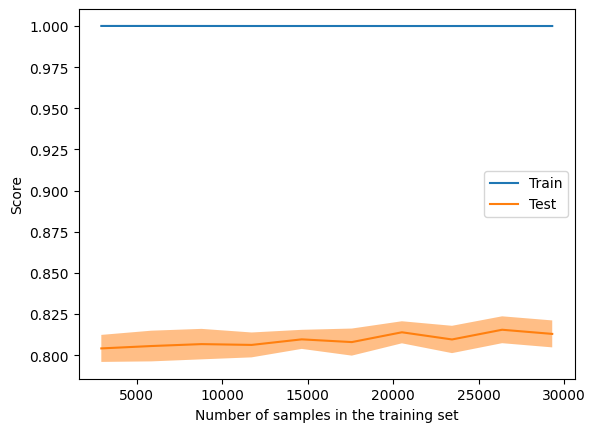

In [67]:
from sklearn import tree
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit, cross_validate
from typing import Any

decision_tree = tree.DecisionTreeClassifier(
    criterion="gini"
)

def display_learning_curve(
    estimator: Any,
    X: Any,
    y: Any,
) -> LearningCurveDisplay:
    return LearningCurveDisplay.from_estimator(
        estimator=estimator,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=ShuffleSplit(
            n_splits=10,
            test_size=0.1 # Use 10% of the data for testing
        ),
        score_type="both",
        n_jobs=-1,
        score_name="Score"
    )

display_learning_curve(decision_tree, training_data, targets)

### Boosted Decision Tree

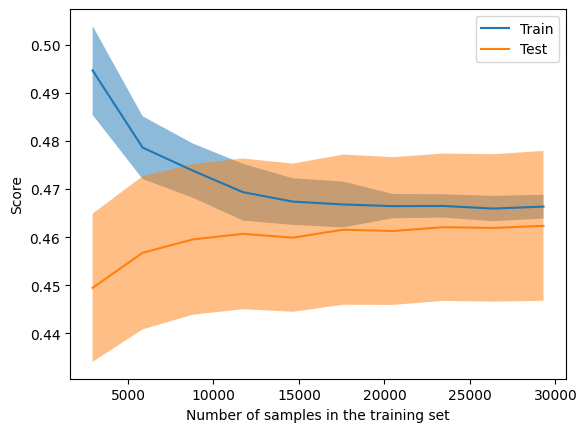

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt = GradientBoostingRegressor(
    n_estimators=50
)

display_learning_curve(gbdt, training_data, targets)

## kNN

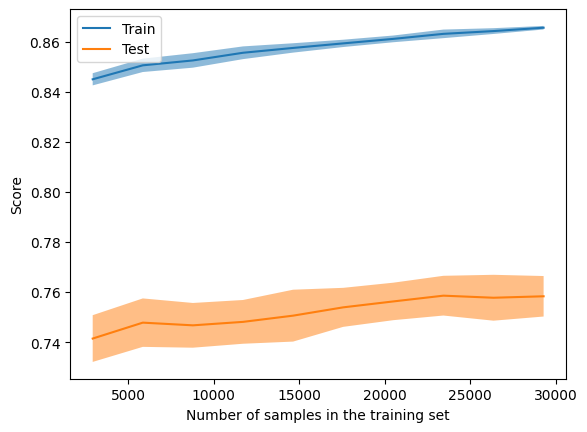

In [69]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbor = KNeighborsClassifier(
    n_neighbors=3
)

display_learning_curve(nearest_neighbor, training_data, targets)

## Support Vector Classification

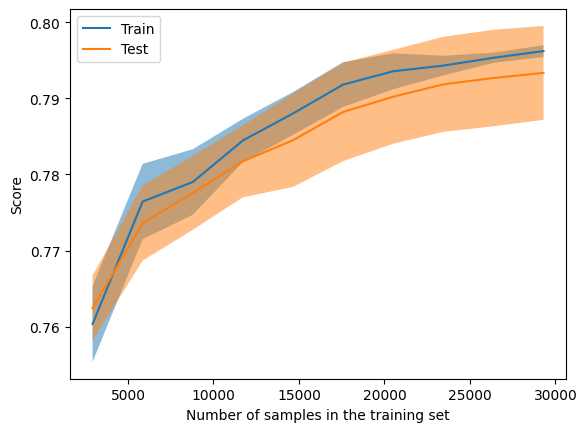

In [70]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", gamma="scale")

display_learning_curve(svc, training_data, targets)

## Neural-Networks

/Users/adriantelleria/gatech/cs7641_machine_learning/assignment_1/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adriantelleria/gatech/cs7641_machine_learning/assignment_1/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adriantelleria/gatech/cs7641_machine_learning/assignment_1/venv/lib/python3.9/site-

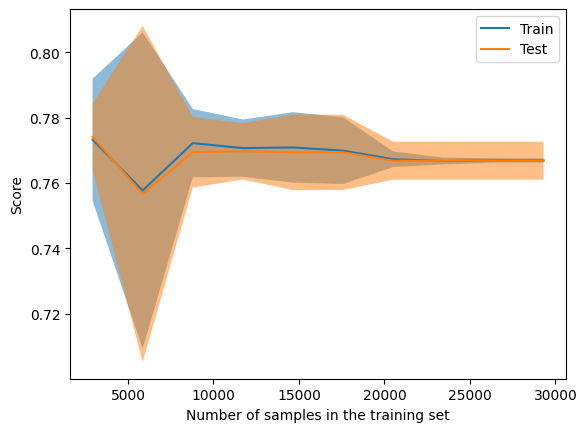

In [73]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=[10, 10],
    solver="lbfgs",
    learning_rate="constant",
    random_state=555
)

display_learning_curve(mlp, training_data, targets)